# Examples - Arc-to-straight design

In [3]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import xtrack as xt
import xplt

## Example 1 - 90 deg FODO lattice with Bends

- Construct a periodic FODO lattice with two Bends of 1.8m separating the 0.4m focusing quadrupoles (bending of 5 degree per dipole)
- Match the lattices to obtain 90 deg phase advance in both the horizontal and vertical planes.

In [4]:
drift_length_ends = 0.25
drift_length = 0.3
quadrupole_length = 0.4
dipole_length = 1.8

dipole_angle = 5/180*np.pi
dipole_bending_radius = dipole_length/dipole_angle

elements_fodo = {
    'm_start_FODO': xt.Marker(),
    'd1': xt.Drift(length=drift_length_ends),
    'qf': xt.Quadrupole(length=quadrupole_length, k1=0.1),
    'd2': xt.Drift(length=drift_length),
    'b1':  xt.Bend(length=dipole_length, k0 = 1/dipole_bending_radius, h = 1/dipole_bending_radius),
    'd3': xt.Drift(length=drift_length),
    'b2':  xt.Bend(length=dipole_length, k0 = 1/dipole_bending_radius, h = 1/dipole_bending_radius),
    'd4': xt.Drift(length=drift_length),
    'qd': xt.Quadrupole(length=quadrupole_length, k1=-0.1),
    'd5': xt.Drift(length=drift_length),
    'b3':  xt.Bend(length=dipole_length, k0 = 1/dipole_bending_radius, h = 1/dipole_bending_radius),
    'd6': xt.Drift(length=drift_length),
    'b4':  xt.Bend(length=dipole_length, k0 = 1/dipole_bending_radius, h = 1/dipole_bending_radius),
    'd7': xt.Drift(length=drift_length),
    'm_end_FODO': xt.Marker(),
 }

fodo_cell = xt.Line(
    elements=elements_fodo,
    element_names=elements_fodo.keys()
)


# Define reference particle
fodo_cell.particle_ref = xt.Particles(p0c=10e9, mass0=xt.PROTON_MASS_EV)
fodo_cell.build_tracker()

In [5]:
sv = fodo_cell.survey()

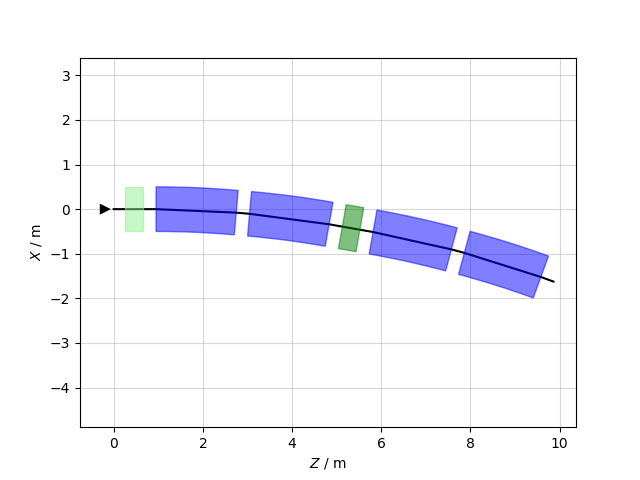

In [6]:
plot = xplt.FloorPlot(sv.rows[:], fodo_cell, 
                #labels = True,
                boxes={  
                    "qf": dict(color="lightgreen"), 
                    "qd": dict(color="green"), 
                    "b." : dict(color="blue"), 
                },
            )

### Set the quadrupole strengths with variables

In [7]:
fodo_cell.vars['kqf'] = 0.1
fodo_cell.vars['kqd'] = -0.1
fodo_cell.element_refs['qf'].k1 = fodo_cell.vars['kqf']
fodo_cell.element_refs['qd'].k1 = fodo_cell.vars['kqd']

### Match the phase advances to 90 degree

In [8]:
# Match tunes and chromaticities to assigned values
opt = fodo_cell.match(
    method='4d',
    vary=[
        xt.VaryList(['kqf', 'kqd'], step=1e-8, tag='quad'),
    ],
    targets = [
        xt.TargetSet(qx=1/4, qy=1/4, tol=1e-6, tag='tune'),
    ])

/opt/homebrew/Caskroom/miniforge/base/envs/xsuite/lib/python3.11/site-packages/xtrack/linear_normal_form.py:186: RuntimeWarning: divide by zero encountered in scalar divide
  n2 = 1./np.sqrt(np.matmul(np.matmul(a2, S), b2))
/opt/homebrew/Caskroom/miniforge/base/envs/xsuite/lib/python3.11/site-packages/xtrack/linear_normal_form.py:190: RuntimeWarning: invalid value encountered in multiply
  a2 *= n2
/opt/homebrew/Caskroom/miniforge/base/envs/xsuite/lib/python3.11/site-packages/xtrack/linear_normal_form.py:194: RuntimeWarning: invalid value encountered in multiply
  b2 *= n2


Matching: model call n. 17               



In [9]:
opt.target_status()
opt.vary_status()

Target status:                           
id state tag  tol_met      residue current_val target_val description                         
 0 ON    tune    True -1.88855e-09        0.25       0.25 'qx', val=0.25, tol=1e-06, weight=10
 1 ON    tune    True -2.02145e-11        0.25       0.25 'qy', val=0.25, tol=1e-06, weight=10
Vary status:                 
id state tag  met name lower_limit current_val upper_limit val_at_iter_0  step weight
 0 ON    quad OK  kqf  None           0.702374 None                  0.1 1e-08      1
 1 ON    quad OK  kqd  None          -0.719535 None                 -0.1 1e-08      1


### Twiss

In [10]:
tw = fodo_cell.twiss(method='4d')
tw_init = tw.get_twiss_init('m_start_FODO')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


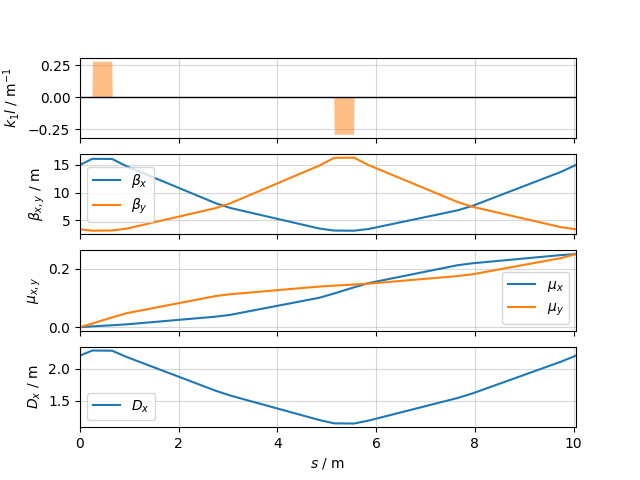

In [14]:
xplt.TwissPlot(tw, line=fodo_cell, line_kwargs={'knl': 'k1l'}, kind="bet,mux+muy,dx")

## Sidenote

Why do we match the phase advance and not directly the beta functions?
Can we simply match the beta functions?

In [17]:
# Match tunes and chromaticities to assigned values
opt = fodo_cell.match(
    method='4d',
    vary=[
        xt.VaryList(['kqf', 'kqd'], step=1e-8, tag='quad'),
    ],
    targets = [
        xt.TargetSet(betx=30, bety=10, at='_end_point', tol=1e-6, tag='beta'),
    ])

Matching: model call n. 21               



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


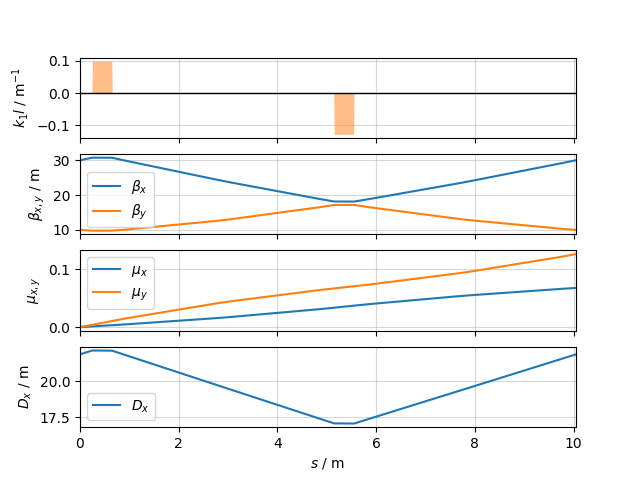

In [18]:
xplt.TwissPlot(fodo_cell.twiss(method='4d'), line=fodo_cell, line_kwargs={'knl': 'k1l'}, kind="bet,mux+muy,dx")

In [29]:
# Match tunes and chromaticities to assigned values
opt = fodo_cell.match(
    method='4d',
    vary=[
        xt.VaryList(['kqf', 'kqd'], step=1e-8, tag='quad'),
    ],
    targets = [
        xt.TargetSet(qx=1/4, qy=1/4, tol=1e-6, tag='tune'),
    ])

Matching: model call n. 16               



## Example 2 - 4 × 90 degree FODO Cell Achromat 

In [30]:
line2 = xt.Line(elements = elements_fodo, 
               element_names = list(elements_fodo.keys())*4
               )

# Define reference particle
line2.particle_ref = xt.Particles(p0c=10e9, mass0=xt.PROTON_MASS_EV)
line2.build_tracker()

In [31]:
line2.get_table().rows[:].show()

name             s element_type isthick isreplica parent_name iscollective
m_start_FODO     0 Marker         False     False None               False
d1               0 Drift           True     False None               False
qf            0.25 Quadrupole      True     False None               False
d2            0.65 Drift           True     False None               False
b1            0.95 Bend            True     False None               False
d3            2.75 Drift           True     False None               False
b2            3.05 Bend            True     False None               False
d4            4.85 Drift           True     False None               False
qd            5.15 Quadrupole      True     False None               False
d5            5.55 Drift           True     False None               False
b3            5.85 Bend            True     False None               False
d6            7.65 Drift           True     False None               False
b4            7.95 Bend  

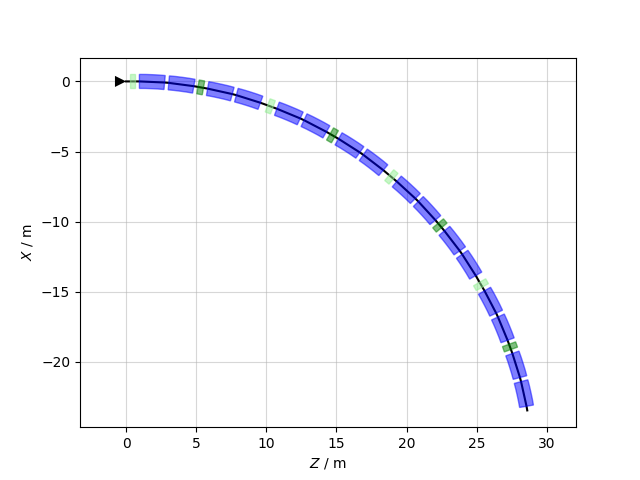

In [32]:
sv = line2.survey()
plot = xplt.FloorPlot(sv.rows[:], line2, 
                #labels = True,
                boxes={  
                    "qf": dict(color="lightgreen"), 
                    "qd": dict(color="green"), 
                    "b." : dict(color="blue"), 
                },
            )

### Twiss

In [33]:
tw = line2.twiss(method='4d',
                start = 'm_start_FODO', end = '_end_point', 
                betx = tw_init.betx, bety = tw_init.bety, 
                alfx = tw_init.alfx, alfy = tw_init.alfy, 
                dx = 0, dpx = 0)

In [34]:
tw[['dx', 'dpx']]

TwissTable: 61 rows, 3 cols
name                  dx          dpx
m_start_FODO           0            0
d1                     0            0
qf                     0            0
d2                     0            0
b1                     0            0
d3               0.07849    0.0871557
b2              0.104637    0.0871557
d4               0.33941     0.173538
qd              0.391471     0.173538
d5              0.484977     0.298468
b3              0.574518     0.298468
d6               1.18738     0.382061
b4                 1.302     0.382061
d7               2.06237     0.462261
m_end_FODO       2.20105     0.462261
m_start_FODO     2.20105     0.462261
d1               2.20105     0.462261
qf               2.31662     0.462261
d2               2.36912    -0.202202
b1               2.30846    -0.202202
d3               2.01467    -0.124031
b2               1.97746    -0.124031
d4               1.82545   -0.0447587
qd               1.81202   -0.0447587
d5               1.899

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


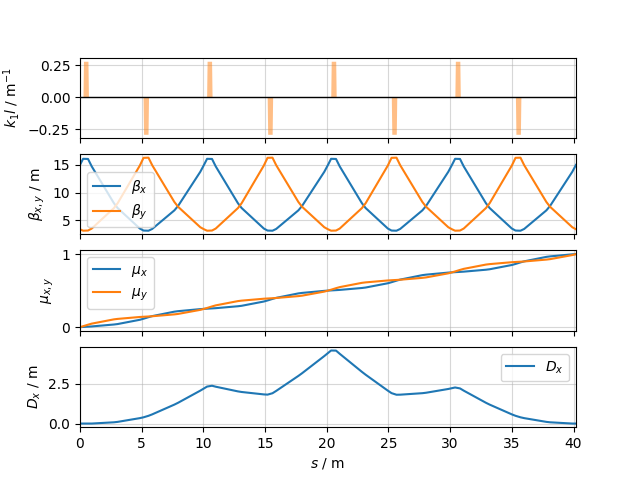

In [35]:
xplt.TwissPlot(tw, line=line2, line_kwargs={'knl': 'k1l'}, kind="bet,mux+muy,dx")

## Example 3 : 2 × 90 degree FODO Cell Disp. Suppressor 

### Construction of the line

In [36]:
elements_ds1 = {
    'm_start_ds1': xt.Marker(),
    'd1': xt.Drift(length=drift_length_ends),
    'qf1': xt.Quadrupole(length=quadrupole_length, k1=0.1),
    'd2': xt.Drift(length=drift_length),
    'D1':  xt.Drift(length=dipole_length),
    'd3': xt.Drift(length=drift_length),
    'b2':  xt.Bend(length=dipole_length, k0 = 1/dipole_bending_radius, h = 1/dipole_bending_radius),
    'd4': xt.Drift(length=drift_length),
    'qd': xt.Quadrupole(length=quadrupole_length, k1=-0.1),
    'd5': xt.Drift(length=drift_length),
    'D3':  xt.Drift(length=dipole_length),
    'd6': xt.Drift(length=drift_length),
    'b4':  xt.Bend(length=dipole_length, k0 = 1/dipole_bending_radius, h = 1/dipole_bending_radius),
    'd7': xt.Drift(length=drift_length),
    'm_end_ds1': xt.Marker(),
 }

elements_ds2 = {
    'm_start_ds2': xt.Marker(),
    'd1': xt.Drift(length=drift_length_ends),
    'qf2': xt.Quadrupole(length=quadrupole_length, k1=0.1),
    'd2': xt.Drift(length=drift_length),
    'D1':  xt.Drift(length=dipole_length),
    'd3': xt.Drift(length=drift_length),
    'b2':  xt.Bend(length=dipole_length, k0 = 1/dipole_bending_radius, h = 1/dipole_bending_radius),
    'd4': xt.Drift(length=drift_length),
    'qd': xt.Quadrupole(length=quadrupole_length, k1=-0.1),
    'd5': xt.Drift(length=drift_length),
    'D3':  xt.Drift(length=dipole_length),
    'd6': xt.Drift(length=drift_length),
    'b4':  xt.Bend(length=dipole_length, k0 = 1/dipole_bending_radius, h = 1/dipole_bending_radius),
    'd7': xt.Drift(length=drift_length),
    'm_end_ds2': xt.Marker(),
 }


In [37]:
elements_fodo.pop("m_start_FODO")
line3 = xt.Line(
    elements = {**elements_fodo, **elements_ds1, **elements_ds2},
    element_names = list(elements_fodo.keys())*2+list(elements_ds1.keys()) +  list(elements_ds2.keys())
                )

line3.particle_ref = xt.Particles(p0c=10e9, mass0=xt.PROTON_MASS_EV)
line3.insert_element('m_start_FODO', xt.Marker(), at_s = 0)

line3.build_tracker()

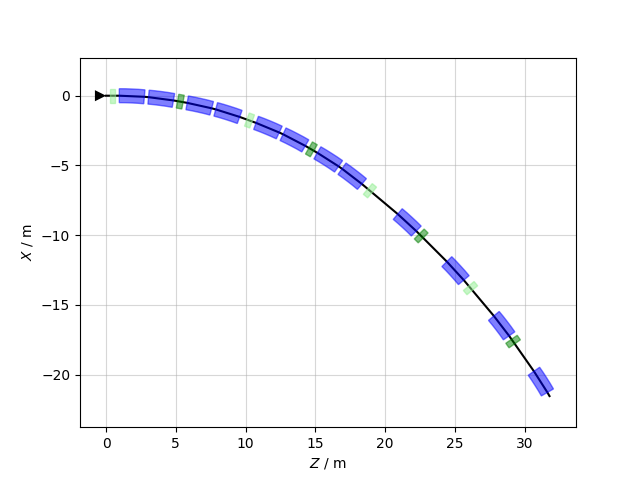

In [38]:
sv = line3.survey()
plot = xplt.FloorPlot(sv.rows[:], line3, 
                #labels = True,
                boxes={  
                    "qf": dict(color="lightgreen"), 
                    "qf.": dict(color="lightgreen"), 
                    "qd": dict(color="green"), 
                    "b." : dict(color="blue"), 
                },
            )
#plt.legend(fontsize='small', loc='upper left')

In [39]:
line3.vars['kqf'] = fodo_cell.vars['kqf']._get_value()
line3.vars['kqf1'] = fodo_cell.vars['kqf']._get_value()
line3.vars['kqf2'] = fodo_cell.vars['kqf']._get_value()
line3.vars['kqd'] = fodo_cell.vars['kqd']._get_value()

line3.element_refs['qf'].k1 = line3.vars['kqf']     
line3.element_refs['qf1'].k1 = line3.vars['kqf1']
line3.element_refs['qf2'].k1 = line3.vars['kqf2']
line3.element_refs['qd'].k1 = line3.vars['kqd']

In [40]:
tw = line3.twiss(method='4d'  ,  
                 init = tw_init,
                 start = 'm_start_FODO', 
                 end = '_end_point')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


TwissTable: 1 row, 3 cols
name              dx       dpx
_end_point 0.0581327 0.0401145


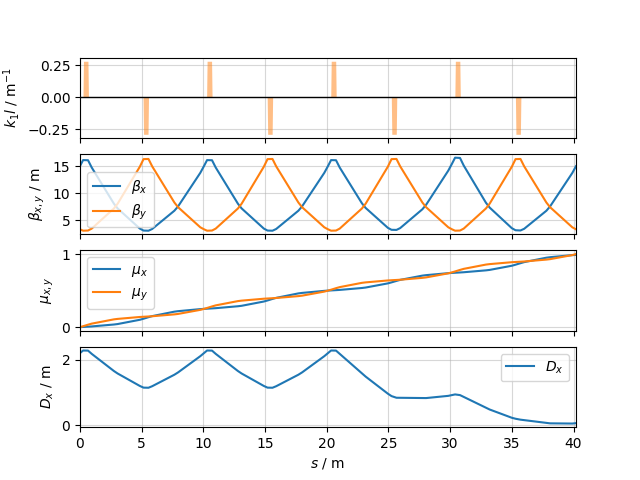

In [41]:
xplt.TwissPlot(tw, line=line3, line_kwargs={'knl': 'k1l'}, kind="bet,mux+muy,dx")
print(tw[['dx', 'dpx'], '_end_point'])

### Matching

In [42]:
#Match D and D' to 0

opt3 = line3.match(
    method='4d',
    init = tw_init,
    start = 'm_start_FODO', 
    end = '_end_point',
    vary=[
        xt.VaryList(['kqf1', 'kqf2'], step=1e-8, tag='quad_f'),
    ],
    targets = [
        xt.TargetSet(dx = 0, dpx = 0, at = '_end_point', tol=1e-10, tag='dispersion'),
    ])

Matching: model call n. 16               



In [43]:
opt3.target_status()
opt3.vary_status()

Target status:                           
id state tag        tol_met      residue  current_val target_val description                                 
 0 ON    dispersion    True -2.06579e-11 -2.06579e-11          0 ('dx', '_end_point'), val=0, tol=1e-10,  ...
 1 ON    dispersion    True -3.04149e-12 -3.04149e-12          0 ('dpx', '_end_point'), val=0, tol=1e-10, ...
Vary status:                 
id state tag    met name lower_limit current_val upper_limit val_at_iter_0  step weight
 0 ON    quad_f OK  kqf1 None           0.669659 None             0.702374 1e-08      1
 1 ON    quad_f OK  kqf2 None           0.713801 None             0.702374 1e-08      1


In [44]:
opt3.log()

Table: 5 rows, 14 cols
iteration     penalty alpha tag tol_met target_active hit_limits vary_active   vary_0   vary_1 ...
        0   0.0706299    -1     nn      yy            nn         yy          0.702374 0.702374
        1   0.0564924     0     nn      yy            nn         yy          0.669626 0.719918
        2 4.60975e-06     0     nn      yy            nn         yy          0.669659 0.713801
        3 3.92695e-10     0     ny      yy            nn         yy          0.669659 0.713801
        4 2.08806e-11     0     yy      yy            nn         yy          0.669659 0.713801

### Twiss

In [45]:
tw = line3.twiss(method='4d'  ,  
                 init = tw_init,
                 start = 'm_start_FODO', 
                 end = '_end_point')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


TwissTable: 1 row, 3 cols
name                 dx          dpx
_end_point -2.06579e-11 -3.04149e-12


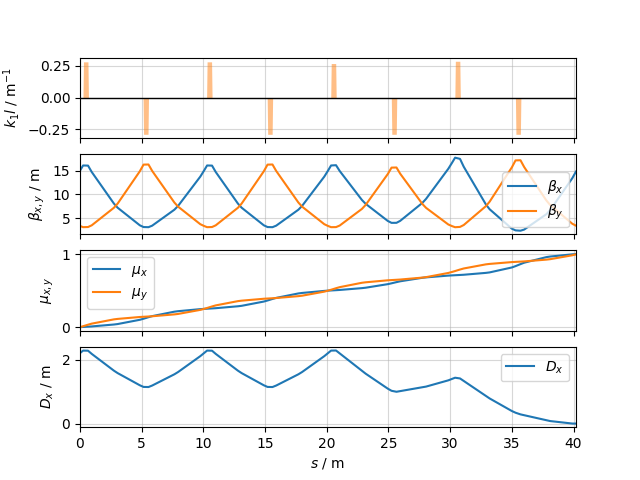

In [46]:
xplt.TwissPlot(tw, line=line3, line_kwargs={'knl': 'k1l'},  kind="bet,mux+muy,dx")
print(tw[['dx', 'dpx'], '_end_point'])